In [2]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')

In [4]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [21]:
alt.Chart(df).mark_circle().encode(
     alt.Y(alt.repeat(), type='quantitative'),
     x='quality'
).repeat(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

alt.RepeatChart(...)

In [22]:
alt.Chart(df).mark_point(opacity=0.02, size=20).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=120,
    height=120
).repeat(
    row=['fixed acidity', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
    column=['fixed acidity', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
)

alt.RepeatChart(...)

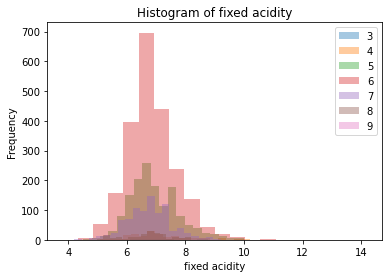

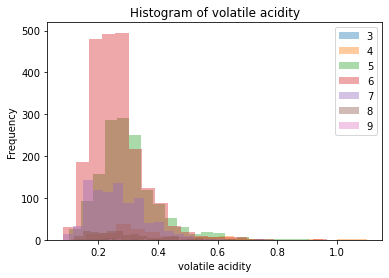

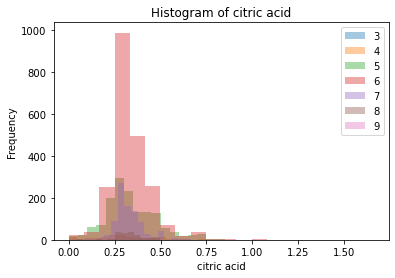

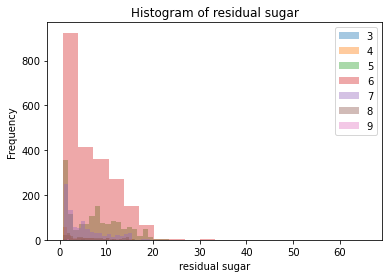

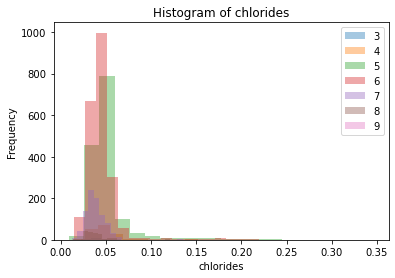

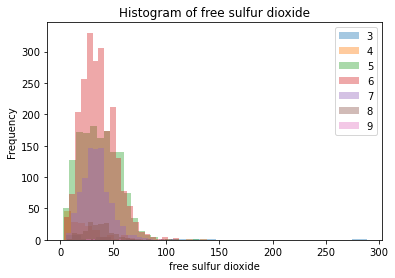

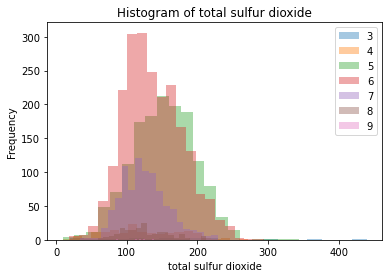

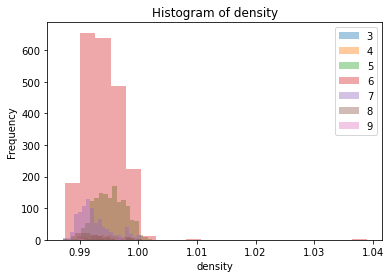

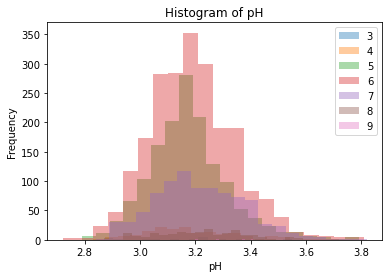

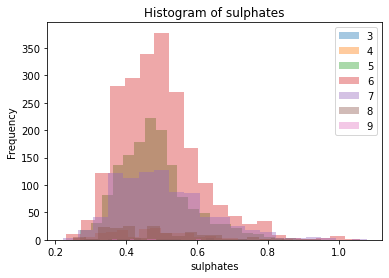

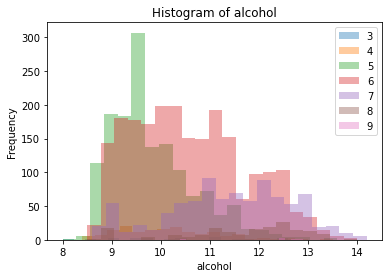

In [25]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
         'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for feat in features:
    ax = df.groupby("quality")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

# Exploratory data analysis of the Wine Quality Data Set (White wine)

## Summary of the dataset

The data set used in this project is the wine quality data set created by Dr. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. It was sourced from the UCI Machine Learning Repository, and you can find it [here](https://archive.ics.uci.edu/ml/datasets/wine+quality). We will be working with the white wine data set for our analysis. 

Each row in the data set represents physicochemical properties of the wine (such as fixed acidity, residual sugar, density, pH, etc), as well as a quality rating (based on sensory data) given to the wine.

There are 4898 observations in the data set, and 11 features. There are 0 observations with missing values. 

Below are the number of observations, ranked highest to lowest, for each quality rating in the data set.

In [22]:
quality_count = pd.DataFrame(df['quality'].value_counts(ascending=False))
quality_count = quality_count.rename(columns={"quality": "count"})
quality_count.index.name = "quality"

quality_count.T

quality     6     5    7    8    4   3  9
count    2198  1457  880  175  163  20  5

In [38]:
alt.Chart(df).mark_bar(size=55).encode(
    x=alt.X('quality', axis=alt.Axis(values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])),
    y='count()')

alt.Chart(...)

# Partitioning the data into training and test sets